In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

    Write a python function buyshares that takes µ, σ, current price p, expected profit b in
    dollars after one year, and expected probability t for getting the profit as parameters,
    and returns the number of share to buy at the current price (ignore the transaction fees
    and assume there is no annual dividends).

In [2]:
def buyshares(mu, o, p, b, t):
    randvar = stats.norm(0, 1)
    z = randvar.ppf(1-t)
    stb = b/(p* (z *o + mu))
    return stb             

    Apply this function to the following case, where the annual rate of return has a mean of
     0.12 and a standard deviation of 0.06. The current price of the stock is 35 per share.
    The client expects to make at least 1000 profit with a probability of at least 90% in
    one year. How many shares should the client buy now?

In [3]:
print("You should buy {:03.2f} shares".format(buyshares(.12, .06, 35, 1000,.9)))
print("You should buy {:03.2f} shares".format(math.floor(buyshares(.12, .06, 35, 1000,.9))))

You should buy 662.80 shares
You should buy 662.00 shares


    Write a Python function testmean(L, t, α), where L is a sample of numbers, t a threshold,
    and α a significance level, and performs a t-test on whether the mean of L is greater than t.
    It should print the test result if the α is not null. Otherwise, it should print the p-value with
    4 digits precision. Apply this function to answer the following questions.

In [4]:
def testmean(l, t, a):
    sampleN = len(l)
    rads = sum(l)/sampleN
    s = stats.tstd(l)
    
    z = (rads - t)/(s/np.sqrt(sampleN))
    tmean = z > stats.norm().ppf(1-a)
    return tmean

    Radium-226 is a natural occurring radioactive gas. EPA limit of Radium-226 in soil is
    4.0 pCi/L. A sample of elevated levels of radium-226 in a city is as follows (measured
    in pCi/L)
    1.46, 0.58, 4.31 ,1.02, 0.17, 2.92, 0.91, 0.43, 0.91, 
    1.30, 8.24, 3.51, 6.87, 1.43, 1.44, 4.49, 4.21, 1.84, 
    5.92, 1.86, 1.41, 1.70, 2.02, 1.65, 1.40, 0.75]
    if testmean(r, 4, .1
    Find the p-value with 4 digits precision, at which we can say that the sample mean is
    greater than the EPA limit.

In [5]:
radium_226 = [1.46, 0.58, 4.31 ,1.02, 0.17, 2.92, 0.91, 0.43, 0.91, 
              1.30, 8.24, 3.51, 6.87, 1.43, 1.44, 4.49, 4.21, 1.84, 
              5.92, 1.86, 1.41, 1.70, 2.02, 1.65, 1.40, 0.75]
if testmean(radium_226, 4, .1):
    print("This area should be quaritined due to high levels of Radium-226 post haste.")
else:
    print("The Radium-226 soil saturation is within acceptable measures.")

The Radium-226 soil saturation is within acceptable measures.


    Consider another sample from a different city.
    3.23, 4.16, 3.4, 4.02, 4.33, 4.05, 4.23, 3.38,
    4.91, 4.02, 4.23, 4.54, 4.14, 4.13, 4.21, 4.66, 
    4.73, 4.05, 4.10, 4.11, 4.21, 4.34, 4.22, 4.21, 
    4.34, 4.35, 4.32, 4.47
    Consider another sample from a different city.
    Find the p-value with 4 digits precision, at which we can say that the sample mean is
    greater than the EPA limit.

In [6]:
radium_226 = [3.23, 4.16, 4.47, 3.40, 4.02, 4.33, 4.05, 4.14, 4.23, 3.38, 
              4.91, 4.02, 4.23, 4.45, 4.14, 4.13, 4.21, 4.66, 4.73, 4.05, 
              4.10, 4.11, 4.21, 4.34, 4.22, 4.21, 4.34, 4.35, 4.32, 4.47]
for p in np.arange(0,1,.0001):
    if testmean(radium_226, 4, p):
        print("P-value = {:.4f}".format(p-.0001))
        break


P-value = 0.0020


    The file MAINELAKE.XLS contains mercury levels of 120 lakes in Maine obtained in
    an environmental study. You should perform the following tasks using this data. In the following,
    let ELEVATION be the independent variable (X) and MERCURY be the dependent
    variable (y).

In [7]:
mainlake = pd.read_excel('MAINELAKE.XLS')

In [8]:
mainlake

,LAKE,MERCURY,NUMFISH,ELEVATION,SURFACE,MAXDEPTH,TYPE,STRATIF,DRAINAGE,RUNOFF,FLUSHING,CLASS,LAT-DEG,LAT-MIN,LAT-SEC,LON-DEG,LON-MIN,LON-SEC
0,ALLEN.P,1.080,3,425,83,27.0,3.0,1.0,2.0,0.60,2.8,1.0,44,57,44,68,5,7
1,ALLIGATOR.P,0.025,2,1494,47,26.0,2.0,0.0,1.0,0.69,0.8,1.0,45,37,50,69,12,30
2,ANASAGUNTICOOK.L,0.570,5,402,568,54.0,2.0,1.0,15.0,0.56,1.1,0.0,44,25,13,70,19,22
3,BALCH&STUMP.PONDS,0.770,5,557,704,44.0,2.0,1.0,14.0,0.58,2.7,0.0,43,37,0,70,59,4
4,BASKAHEGAN.L,0.790,5,417,6944,22.0,2.0,0.0,123.0,0.57,2.0,1.0,45,30,32,67,50,2
5,BAUNEAG.BEG.L,0.750,4,205,200,29.0,2.0,1.0,18.0,0.51,9.6,0.0,43,21,46,70,44,23
6,BEAVER.P,0.270,5,397,128,8.0,3.0,0.0,2.0,0.61,7.9,1.0,43,59,47,70,49,26
7,BELDEN.P,0.660,3,350,24,30.0,3.0,1.0,1.0,NaN,NaN,1.0,44,24,48,69,23,8
8,BEN.ANNIS.P,0.180,5,122,25,9.0,2.0,0.0,10.0,0.51,58.8,1.0,44,46,25,68,56,35
9,BOTTLE.L,1.050,5,298,281,42.0,2.0,1.0,8.0,0.48,2.1,1.0,45,18,36,68,3,17


    Plot the histograms for attributes ELEVATION and MERCURY.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efccab9be48>,
      dtype=object)

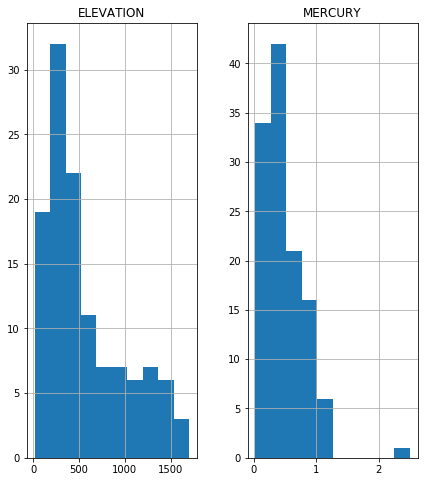

In [9]:
mainlake[['ELEVATION','MERCURY']].hist(figsize = (7,8))


    Plot a scatterplot of ELEVATION and MERCURY.

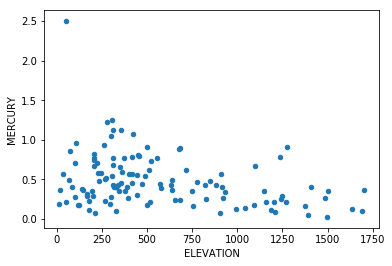

In [10]:
mainlake.plot.scatter(x = 'ELEVATION', y = 'MERCURY')


    Use seaborn to plot a linear regression line

/home/julian/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


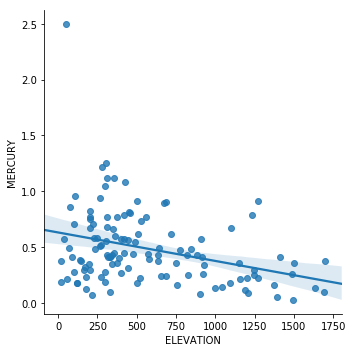

In [11]:
sns.lmplot(x = 'ELEVATION', y = 'MERCURY', data = mainlake)
plt.show()

    (d) Use statsmodels to obtain a simple linear model (i.e., OLS) E(y) = β0 + β1x, where
    y is the mercury level and x is the elevation. Print the model summary, and find the
    values of β0 and β1.

In [12]:
y = mainlake.MERCURY
X = mainlake.ELEVATION
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print("{}\n{}\n{}".format(results.summary(), results.params[0], results.params[1]))

                            OLS Regression Results                            
Dep. Variable:                MERCURY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     14.39
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           0.000236
Time:                        20:18:15   Log-Likelihood:                -31.010
No. Observations:                 120   AIC:                             66.02
Df Residuals:                     118   BIC:                             71.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6298      0.048     13.167      0.0

Repeat this using sklearn

In [53]:
linreg = linear_model.LinearRegression()

elevation_X_train = mainlake.ELEVATION
elevation_X_train = elevation_X_train[:, np.newaxis]
elevation_X_test = mainlake.ELEVATION
elevation_X_test = elevation_X_test[:, np.newaxis]


mercury_y_train = mainlake.MERCURY
mercury_y_test = mainlake.MERCURY

In [54]:
linreg.fit(elevation_X_train, mercury_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
mercury_prediction = linreg.predict(elevation_X_test)

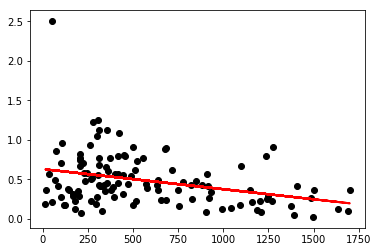

In [56]:
plt.scatter(mainlake.ELEVATION, mainlake.MERCURY, color = 'black')
plt.plot(elevation_X_test, mercury_prediction, color = 'r', lw =2)

plt.show()

In [57]:
print("Coefficients are {}".format(linreg.coef_))

Coefficients are [-0.00025509]
